### Forecasting

In [73]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [74]:
data = pd.read_excel('C:\\Users\\abhishe\\OneDrive\\Desktop\\excelr assignments\\Assignment_18_forecasting\\datasets\\CocaCola_Sales_Rawdata.xlsx')
data

,Quarter,Sales
0,q1_86,1734.827000
1,q2_86,2244.960999
2,q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [75]:
data.shape

(42, 2)

In [33]:
# We will extract Quarter values and Year values separately from 'Quarter column'
data['Quarters'] = 0
data['Year'] = 0
for i in range(42):
    p = data["Quarter"][i]
    data['Quarters'][i]= p[0:2]
    data['Year'][i]= p[3:5]

In [76]:
data.head()

,Quarter,Sales
0,q1_86,1734.827000
1,q2_86,2244.960999
2,q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [79]:
# Getting dummy variables for Quarters Q1, Q2, Q3, Q4 
Quarters_Dummies = pd.DataFrame(pd.get_dummies(data['Quarter']))
data = pd.concat([data,Quarters_Dummies],axis = 1)
data.head()

,Quarter,Sales,Q1_87,Q1_88,Q1_89,Q1_90,Q1_91,Q1_92,Q1_93,Q1_94,...,Q4_89,Q4_90,Q4_91,Q4_92,Q4_93,Q4_94,Q4_95,q1_86,q2_86,q3_86
0,q1_86,1734.827000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,q2_86,2244.960999,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,q3_86,2533.804993,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Q4_86,2154.962997,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Q1_87,1547.818996,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


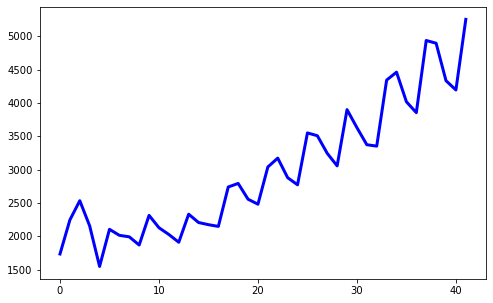

In [36]:
# Lineplot for Sales of CocaCola
plt.figure(figsize=(8,5))
plt.plot(data['Sales'], color = 'blue', linewidth=3)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

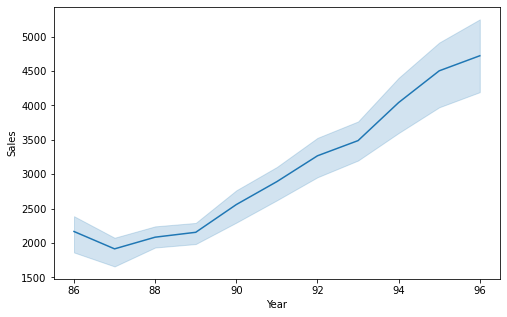

In [37]:
plt.figure(figsize=(8,5))
sns.lineplot(x="Year",y="Sales",data=data)

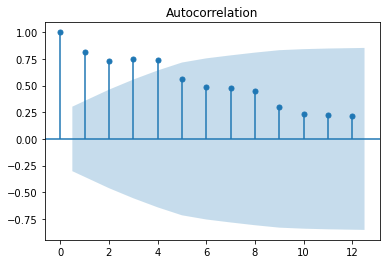

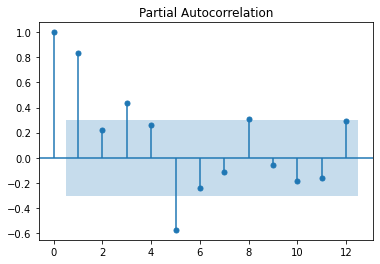

In [80]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Sales,lags=12)
tsa_plots.plot_pacf(data.Sales,lags=12)
plt.show()

### Data Driven Forecasting Methods

In [81]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [40]:
#Splitting Data into Train and Test (77/33)
Train = data.head(32)
Test = data.tail(10)

### Moving Average Method

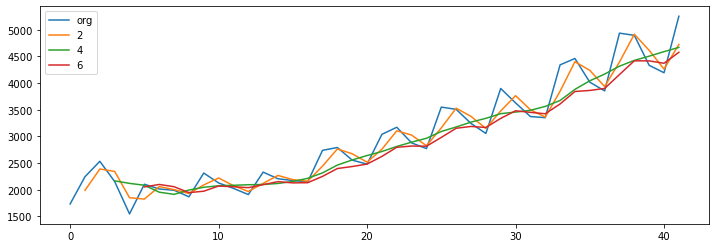

In [82]:
plt.figure(figsize=(12,4))
data.Sales.plot(label="org")
for i in range(2,8,2):
    data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

### Time series decomposition plot

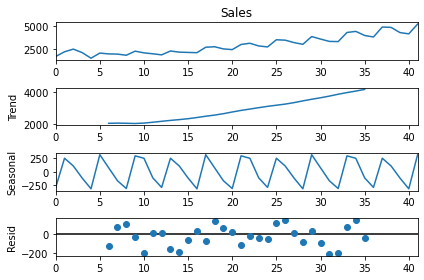

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(data.Sales,period=12)
decompose_ts_add.plot()
plt.show()

### Evaluation Metric RMSE

In [84]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

### Simple Exponential Method

In [85]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses = RMSE(Test.Sales, pred_ses)
rmse_ses

1035.1983219196004

### Holt Method

In [86]:
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw = RMSE(Test.Sales, pred_hw)
rmse_hw

708.8812989535168

### Holts winter exponential smoothing with additive seasonality and additive trend

In [87]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add = RMSE(Test.Sales, pred_hwe_add_add)
rmse_hwe_add_add

480.5493437573354

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [88]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_mul_add = RMSE(Test.Sales, pred_hwe_mul_add)
rmse_hwe_mul_add

547.9743419527241

### Model based Forecasting Methods

In [89]:
# Data preprocessing for models
data["t"] = np.arange(1,43)
data["t_squared"] = data["t"]*data["t"]

data["log_sales"] = np.log(data["Sales"])

data.head()

,Quarter,Sales,Q1_87,Q1_88,Q1_89,Q1_90,Q1_91,Q1_92,Q1_93,Q1_94,...,Q4_92,Q4_93,Q4_94,Q4_95,q1_86,q2_86,q3_86,t,t_squared,log_sales
0,q1_86,1734.827000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,7.458663
1,q2_86,2244.960999,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,2,4,7.716443
2,q3_86,2533.804993,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,9,7.837477
3,Q4_86,2154.962997,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,7.675529
4,Q1_87,1547.818996,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,7.344602


In [90]:
#Splitting data into Train and Test
Train = data.head(32)
Test = data.tail(10)

In [91]:
train.head()

NameError: name 'train' is not defined

In [92]:
test.head()

NameError: name 'test' is not defined

### Splitting Data

In [93]:
# Splitting data into Train and Test (77/33)
Train = data.head(32)
Test = data.tail(10)

### Linear Model

In [94]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model = RMSE(Test['Sales'], pred_linear)
rmse_linear_model

752.9233932767121

### Exponential Model

Exp = smf.ols('log_sales~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_exp = RMSE(Test['Sales'], np.exp(pred_Exp))
rmse_exp

In [95]:
Exp = smf.ols('log_sales~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_exp = RMSE(Test['Sales'], np.exp(pred_Exp))
rmse_exp


NameError: name 'train' is not defined

### Quadratic Model

In [96]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_quad_model = RMSE(Test['Sales'], pred_Quad)
rmse_quad_model


457.7357355407437

### Additive Seasonality model

In [97]:
add_sea = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1', 'Q2', 'Q3']]))
rmse_add_sea = RMSE(Test['Sales'], pred_add_sea)
rmse_add_sea

PatsyError: Error evaluating factor: NameError: name 'Q1' is not defined
    Sales~Q1+Q2+Q3
          ^^

### Additive Seasonality Quadratic model

In [98]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_quad = RMSE(Test['Sales'], pred_add_sea_quad)
rmse_add_sea_quad  

PatsyError: Error evaluating factor: NameError: name 'Q2' is not defined
    Sales~t+t_squared+Q1+Q2+Q3
                         ^^

### Multiplicative Seasonality model

In [99]:
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3',data=Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mul_sea = RMSE(Test['Sales'], np.exp(pred_Mult_sea))
rmse_Mul_sea

PatsyError: Error evaluating factor: NameError: name 'Q1' is not defined
    log_sales~Q1+Q2+Q3
              ^^

### Multiplicative Addictive Seasonality Model

In [59]:
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3',data = Train).fit()
pred_Mul_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mul_add_sea = RMSE(Test['Sales'], np.exp(pred_Mul_add_sea))
rmse_Mul_add_sea

448.8678182691915

In [ ]:
list = [['Simple Exponential Method',rmse_ses], ['Holt method',rmse_hw],
          ['HW exp smoothing add',rmse_hwe_add_add],['HW exp smoothing mult',rmse_hwe_mul_add],
          ['Linear Mode',rmse_linear],['Exp model',rmse_Exp],['Quad model',rmse_quad],
          ['add seasonality',rmse_add_sea],['Quad add seasonality',rmse_add_sea_quad],
          ['Mult Seasonality',rmse_Mul_sea],['Mult add seasonality',rmse_Mul_add_sea]]

In [ ]:
df = pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
df

### Building final model with least RMSE value

In [104]:
data.head()

,Quarter,Sales,Q1_87,Q1_88,Q1_89,Q1_90,Q1_91,Q1_92,Q1_93,Q1_94,...,Q4_92,Q4_93,Q4_94,Q4_95,q1_86,q2_86,q3_86,t,t_squared,log_sales
0,q1_86,1734.827000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,7.458663
1,q2_86,2244.960999,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,2,4,7.716443
2,q3_86,2533.804993,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,9,7.837477
3,Q4_86,2154.962997,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,7.675529
4,Q1_87,1547.818996,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,7.344602


In [ ]:
final_model = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=data).fit()
pred_final = pd.Series(final_model.predict(data[['Q1','Q2','Q3','t','t_squared']]))
rmse_final_model = RMSE(data['Sales'], pred_final)
rmse_final_model

In [ ]:
pred_df = pd.DataFrame({'Actual' : data.Sales, 'Predicted' : pred_final})
pred_df

### Forecasting_2

In [107]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [109]:
data = pd.read_excel('C:\\Users\\abhishe\\OneDrive\\Desktop\\excelr assignments\\Assignment_18_forecasting\\datasets\\Airlines+Data.xlsx')
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [110]:
data.shape

(96, 2)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [112]:
# Getting dummy variables 
Months_Dummies = pd.DataFrame(pd.get_dummies(data['Month']))
data_dm = pd.concat([data,Months_Dummies],axis = 1)
data_dm.head()

,Month,Passengers,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2002-03-01 00:00:00,2002-04-01 00:00:00,2002-05-01 00:00:00,2002-06-01 00:00:00,2002-07-01 00:00:00,2002-08-01 00:00:00,2002-09-01 00:00:00,2002-10-01 00:00:00,2002-11-01 00:00:00,2002-12-01 00:00:00
0,1995-01-01,112,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


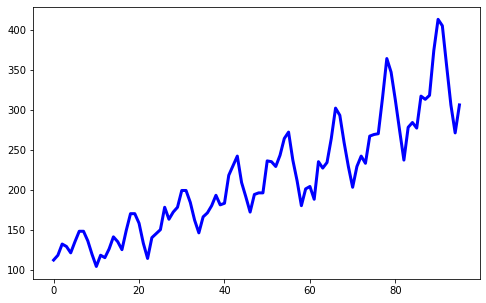

In [113]:
# Lineplot for passengers
plt.figure(figsize=(8,5))
plt.plot(data['Passengers'], color = 'blue', linewidth=3)

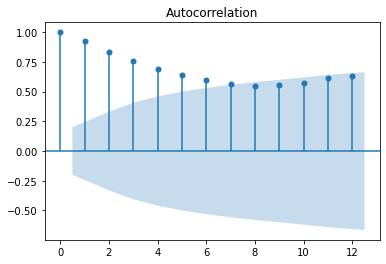

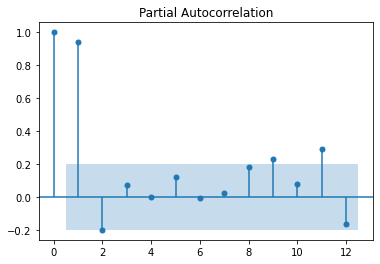

In [114]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Passengers,lags=12)
tsa_plots.plot_pacf(data.Passengers,lags=12)
plt.show()

### Data Driven Forecasting Methods

In [115]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [116]:
#Splitting Data into Train and Test (77/33)
Train = data.head(84)
Test = data.tail(12)

### Moving Average Method

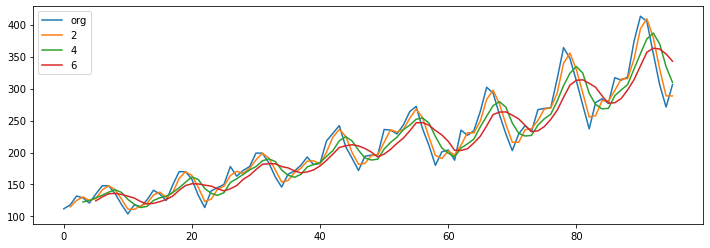

In [117]:
plt.figure(figsize=(12,4))
data.Passengers.plot(label="org")
for i in range(2,8,2):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

### Time Series Decomposition plot

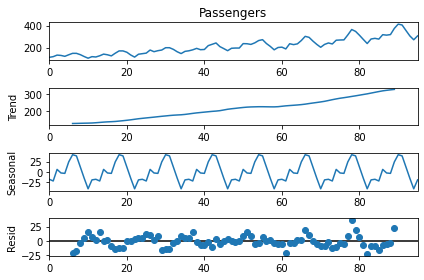

In [118]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

### Evaluation Metric RMSE

In [119]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

### Simple Exponential Method

In [120]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses = RMSE(Test.Passengers, pred_ses)
rmse_ses

68.00674031350329

### Holt Method

In [121]:
hw_model = Holt(Train["Passengers"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw = RMSE(Test.Passengers, pred_hw)
rmse_hw

58.56209934996357

# Holts winter exponential smoothing with additive seasonality and additive trend

In [122]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add = RMSE(Test.Passengers, pred_hwe_add_add)
rmse_hwe_add_add

62.517009186392954

# Holts winter exponential smoothing with additive seasonality and additive trend

In [123]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_mul_add = RMSE(Test.Passengers, pred_hwe_mul_add)
rmse_hwe_mul_add

64.61237956512532

### Model based Forecasting Methods

In [124]:
# Data preprocessing for models
data["t"] = np.arange(1,97)
data["t_squared"] = data["t"]*data["t"]

data["log_psngr"] = np.log(data["Passengers"])

data.head()

,Month,Passengers,t,t_squared,log_psngr
0,1995-01-01,112,1,1,4.718499
1,1995-02-01,118,2,4,4.770685
2,1995-03-01,132,3,9,4.882802
3,1995-04-01,129,4,16,4.859812
4,1995-05-01,121,5,25,4.795791


In [125]:
# Splitting data into Train and Test (77/33)
Train = data.head(84)
Test = data.tail(12)

In [126]:
Train.head()

,Month,Passengers,t,t_squared,log_psngr
0,1995-01-01,112,1,1,4.718499
1,1995-02-01,118,2,4,4.770685
2,1995-03-01,132,3,9,4.882802
3,1995-04-01,129,4,16,4.859812
4,1995-05-01,121,5,25,4.795791


In [127]:
Test.head()

,Month,Passengers,t,t_squared,log_psngr
84,2002-01-01,284,85,7225,5.648974
85,2002-02-01,277,86,7396,5.624018
86,2002-03-01,317,87,7569,5.758902
87,2002-04-01,313,88,7744,5.746203
88,2002-05-01,318,89,7921,5.762051


### Linear Model

In [128]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = RMSE(Test['Passengers'], pred_linear)
rmse_linear

53.19923653480267

### Quadratic Model

In [131]:
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_quad_model = RMSE(Test['Passengers'], pred_Quad)
rmse_quad_model

48.05188897933096

In [ ]:
list = [['Simple Exponential Method',rmse_ses], ['Holt method',rmse_hw],
          ['HW exp smoothing add',rmse_hwe_add_add],['HW exp smoothing mult',rmse_hwe_mul_add],
          ['Linear Mode',rmse_linear],['Exp model',rmse_Exp],['Quad model',rmse_quad_model]]
         

In [ ]:
df = pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
df

### Building final model with least RMSE value

In [133]:
data.head()

,Month,Passengers,t,t_squared,log_psngr
0,1995-01-01,112,1,1,4.718499
1,1995-02-01,118,2,4,4.770685
2,1995-03-01,132,3,9,4.882802
3,1995-04-01,129,4,16,4.859812
4,1995-05-01,121,5,25,4.795791


In [134]:
final_model = smf.ols('Passengers~t+t_squared',data=data).fit()
pred_final = pd.Series(final_model.predict(data[['t','t_squared']]))
rmse_final_model = RMSE(data['Passengers'], pred_final)
rmse_final_model

29.590971625300256

In [135]:
pred_df = pd.DataFrame({'Actual' : data.Passengers, 'Predicted' : pred_final})
pred_df

,Actual,Predicted
0,112,119.158137
1,118,120.460303
2,132,121.784439
3,129,123.130544
4,121,124.498617
...,...,...
91,405,327.618598
92,355,330.919950
93,306,334.243270
94,271,337.588559
